## Water Rocket Model, code developed from examples here:

https://towardsdatascience.com/a-simple-method-for-numerical-integration-in-python-579f785d7a93

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [59]:
# Model for solve_ivp
def model(t, Y):
    P = Y[0]
    v = Y[1]
    h = Y[2]
    P0 = 320000 #Pascal
    V0 = 0.75 #liter
    Vt = 2 #liter
    Ae = np.pi*0.01**2
    Pa = 101325 #Pascal
    rho = 1
    D = 0
    mr = 0.050 # empty rocket mass
    # deal with mass pre and post burnout
    if (P0*V0/P > Vt):
        M = rho*(Vt - P0*V0/P) + mr
    else:
        M = mr
    g = 9.8

    dPdt = -(P**2)/(P0*V0) * Ae * np.sqrt(2*(P-Pa)/rho)
    dvdt = (2*Ae*(P-Pa) - D*v*np.abs(v))/M - g
    dhdt = v
    dYdt = [dPdt, dvdt, dhdt]
    return dYdt

In [64]:
# Initial Conditions
Y0 = [320000, 0.0, 0.0]  # [P0, v0, h0]

# Time Span of Interest
tspan = (0, 1)  # (t0, tf)

# Solving ODE
sol = solve_ivp(model, tspan, Y0, method='RK45', rtol=1e-10)
P_sol, v_sol, h_sol = sol.y
time = sol.t

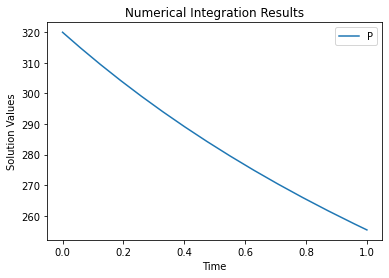

In [65]:
# Plotting Results
plt.plot(time, P_sol/1000)
#plt.plot(time, v_sol)
#plt.plot(time, h_sol)
plt.title('Numerical Integration Results')
plt.xlabel('Time')
plt.ylabel('Solution Values')
plt.legend(['P', 'v', 'h'])
plt.show()